In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [178]:
jeju = df[df['정점명'].isin(['제주1', '제주2', '제주3'])].drop(['정점명'], axis=1)

In [179]:
jeju

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
20,2021-11-18,13.0,9.0,1,18.52,33.66,8.08,8.62,0.42,6.76,...,0.48,0,0,1,0,0,1,2021,11,18
21,2021-11-18,22.0,13.0,1,17.91,33.19,8.12,8.89,0.77,20.27,...,0.80,0,0,1,0,0,1,2021,11,18
22,2021-11-18,29.0,9.0,1,18.30,33.59,8.09,8.75,0.48,10.32,...,0.55,0,0,1,0,0,1,2021,11,18
30,2021-11-18,13.0,9.0,1,18.54,33.66,8.09,8.09,1.27,16.90,...,0.64,0,0,1,0,1,0,2021,11,18
31,2021-11-18,22.0,13.0,1,18.22,33.41,8.10,8.75,1.42,22.20,...,0.53,0,0,1,0,1,0,2021,11,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,2011-02-23,25.0,7.8,1,13.78,34.47,8.09,9.50,0.29,50.30,...,1.62,0,0,1,0,1,0,2011,2,23
1616,2011-02-22,14.0,7.9,2,13.42,34.46,8.10,9.75,0.25,50.90,...,2.57,0,1,0,0,0,1,2011,2,22
1617,2011-02-22,20.0,6.7,2,13.38,34.50,8.11,9.78,0.41,62.10,...,0.61,0,1,0,0,0,1,2011,2,22
1627,2011-02-22,14.0,7.9,2,13.44,34.47,8.11,9.49,0.19,55.60,...,0.20,0,1,0,0,1,0,2011,2,22


In [180]:
year_avg = jeju.groupby('년')['수온'].mean()

year_avg

년
2011    18.741250
2012    18.204444
2013    19.159167
2014    17.953333
2015    18.565000
2016    18.013750
2017    19.140833
2018    17.430833
2019    19.855833
2020    18.893333
2021    19.123333
Name: 수온, dtype: float64

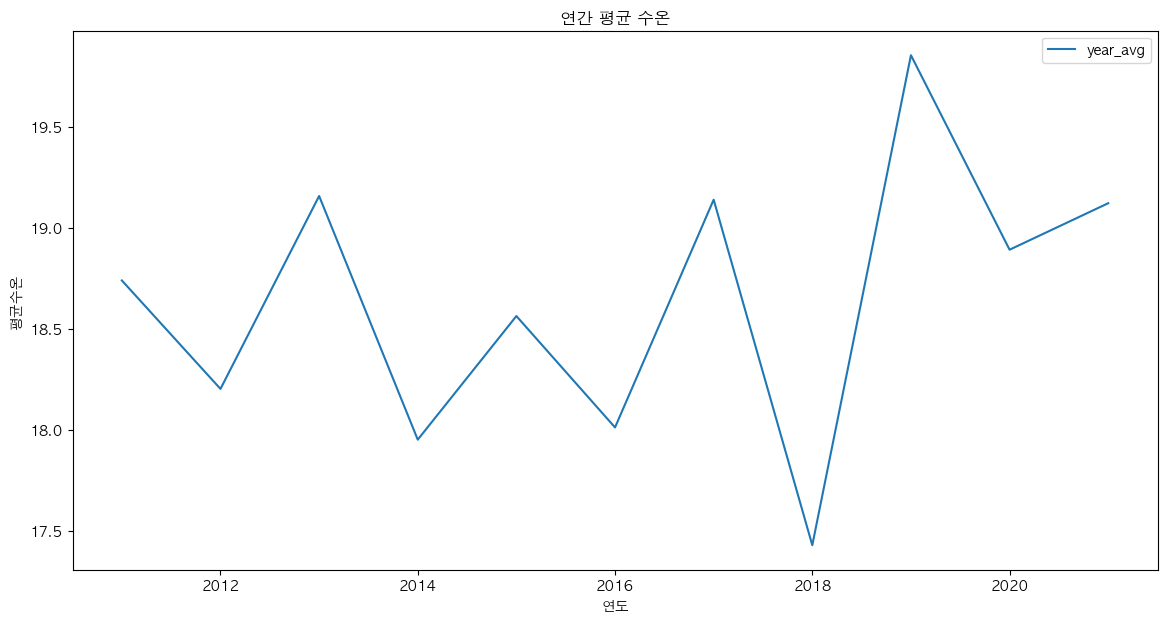

In [181]:
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [182]:
month_avg = jeju.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     13.550000
      5     15.703333
      8     24.323333
      11    21.388333
2012  2     13.773333
      5     16.476667
      8     24.363333
2013  2     13.333333
      5     16.643333
      8     26.513333
      11    20.146667
2014  2     14.490000
      5     18.751667
      8     20.791667
      11    17.780000
2015  2     13.301667
      5     16.368333
      8     24.273333
      11    20.316667
2016  2     13.345000
      5     16.173333
      8     23.731667
      11    18.805000
2017  2     14.316667
      5     15.505000
      8     25.995000
      11    20.746667
2018  2     13.866667
      5     15.853333
      8     20.801667
      11    19.201667
2019  2     15.128333
      5     16.711667
      8     26.855000
      11    20.728333
2020  2     14.935000
      5     16.273333
      8     25.353333
      11    19.011667
2021  2     14.973333
      5     17.978333
      8     25.233333
      11    18.308333
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


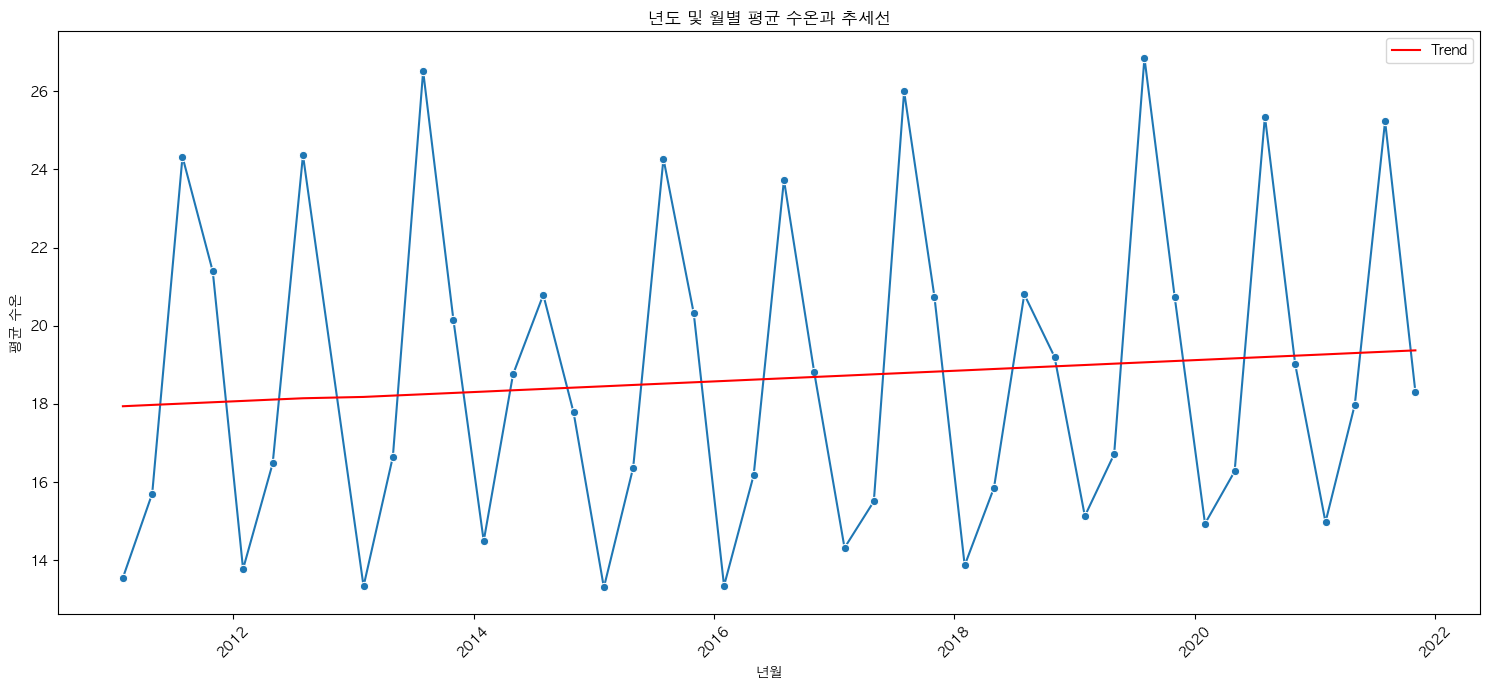

In [183]:
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [184]:
train_df = jeju[jeju['년'] < 2021].drop('측정 일자', axis = 1)

test_df = jeju[jeju['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [185]:
train_df

,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
160,16.0,7.0,2,18.17,31.42,8.33,8.88,0.71,8.09,2.52,...,0.83,0,0,1,0,0,1,2020,11,9
161,27.0,6.7,3,18.44,32.28,8.35,8.84,1.01,4.62,4.14,...,3.94,0,0,1,0,0,1,2020,11,9
162,17.0,8.2,2,18.07,31.67,8.35,9.96,0.95,1.71,2.72,...,0.81,0,0,1,0,0,1,2020,11,9
179,16.0,7.0,2,19.41,33.15,8.34,8.63,0.96,19.85,2.73,...,1.53,0,0,1,0,1,0,2020,11,9
180,27.0,6.7,3,20.39,34.02,8.33,8.49,2.08,19.29,3.68,...,3.72,0,0,1,0,1,0,2020,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,25.0,7.8,1,13.78,34.47,8.09,9.50,0.29,50.30,4.00,...,1.62,0,0,1,0,1,0,2011,2,23
1616,14.0,7.9,2,13.42,34.46,8.10,9.75,0.25,50.90,3.00,...,2.57,0,1,0,0,0,1,2011,2,22
1617,20.0,6.7,2,13.38,34.50,8.11,9.78,0.41,62.10,2.60,...,0.61,0,1,0,0,0,1,2011,2,22
1627,14.0,7.9,2,13.44,34.47,8.11,9.49,0.19,55.60,3.00,...,0.20,0,1,0,0,1,0,2011,2,22


In [186]:
test_df

,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
20,13.0,9.0,1,18.52,33.66,8.08,8.62,0.42,6.76,5.22,...,0.48,0,0,1,0,0,1,2021,11,18
21,22.0,13.0,1,17.91,33.19,8.12,8.89,0.77,20.27,4.19,...,0.80,0,0,1,0,0,1,2021,11,18
22,29.0,9.0,1,18.30,33.59,8.09,8.75,0.48,10.32,5.07,...,0.55,0,0,1,0,0,1,2021,11,18
30,13.0,9.0,1,18.54,33.66,8.09,8.09,1.27,16.90,5.52,...,0.64,0,0,1,0,1,0,2021,11,18
31,22.0,13.0,1,18.22,33.41,8.10,8.75,1.42,22.20,5.05,...,0.53,0,0,1,0,1,0,2021,11,18
32,29.0,9.0,1,18.36,33.65,8.08,8.58,0.45,10.46,4.21,...,0.46,0,0,1,0,1,0,2021,11,18
41,15.0,8.8,1,26.84,30.67,8.29,7.79,1.83,29.40,0.90,...,0.88,0,0,1,0,0,1,2021,8,31
42,17.0,12.0,1,26.70,30.83,8.21,6.75,1.79,29.70,1.60,...,1.03,0,0,1,0,0,1,2021,8,31
43,19.0,12.3,1,25.93,30.77,8.23,7.37,1.69,4.90,1.50,...,0.49,0,0,1,0,0,1,2021,8,31
55,15.0,8.8,1,24.93,31.51,8.22,7.04,1.71,15.70,3.60,...,0.48,0,0,1,0,1,0,2021,8,31


In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  0.7181041666666633


In [188]:
predictions

array([19.1331, 19.48  , 19.1181, 19.2207, 18.8219, 18.9404, 26.0779,
       25.7874, 24.3764, 23.0496, 23.7258, 22.4066, 19.0008, 19.1014,
       19.0009, 18.9355, 18.8913, 18.8484, 14.8774, 14.9297, 14.9718,
       14.8588, 14.9324, 14.9922])

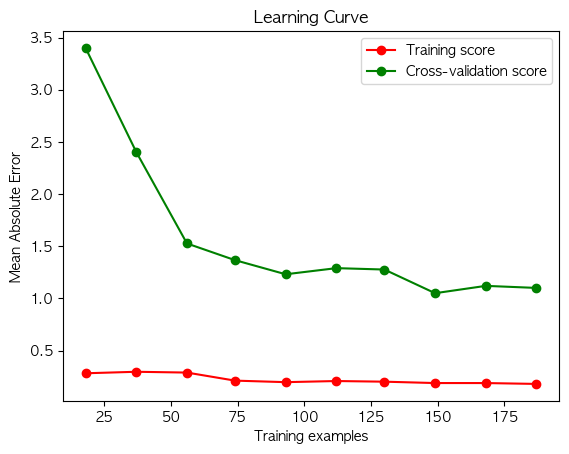

In [189]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


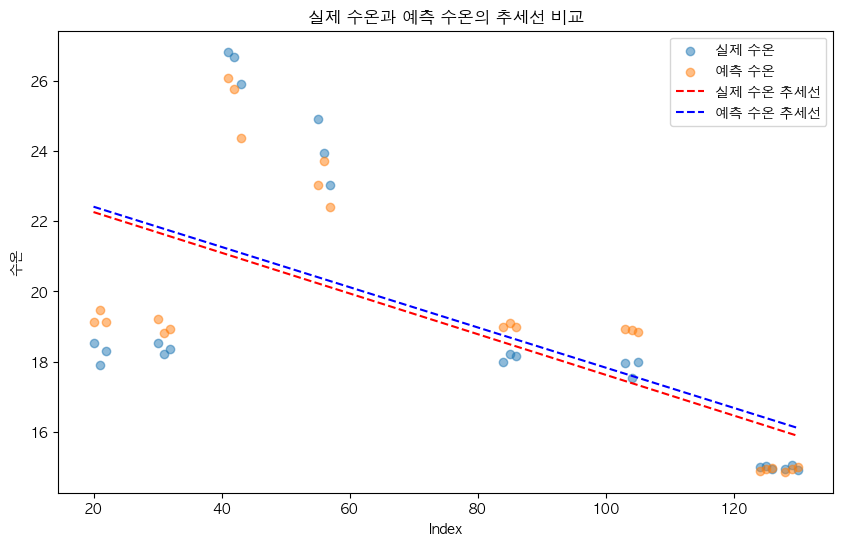

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [191]:
jeju.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

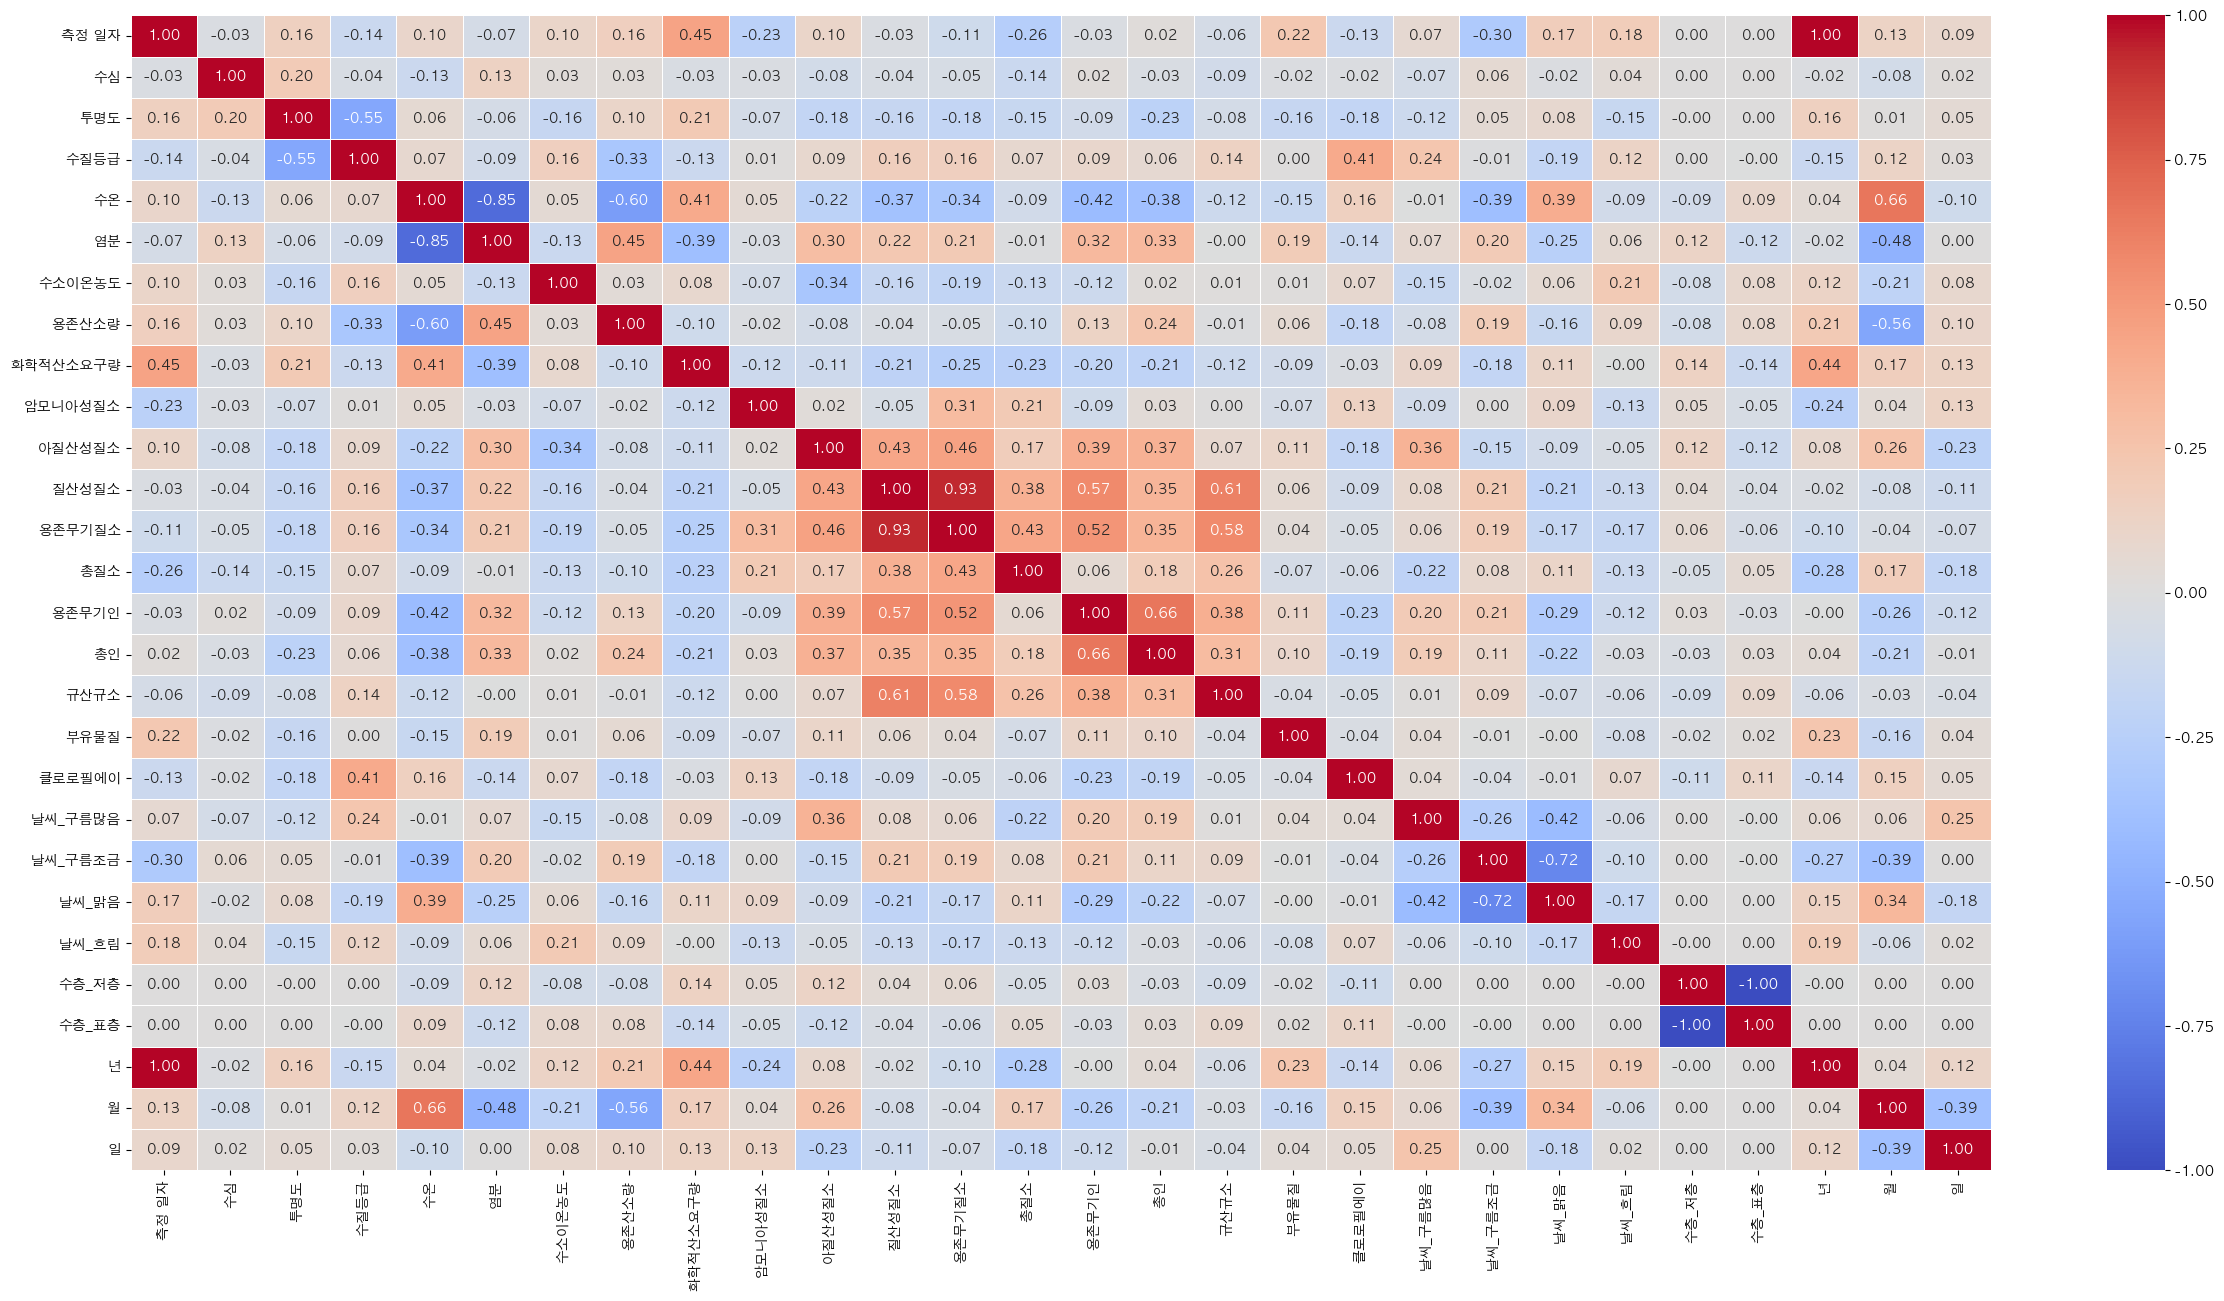

In [192]:
jejucorr = jeju.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(jejucorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [193]:
temp = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [194]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
20,18.52,0,0,1,0,11
21,17.91,0,0,1,0,11
22,18.30,0,0,1,0,11
30,18.54,0,0,1,0,11
31,18.22,0,0,1,0,11
...,...,...,...,...,...,...
1608,13.78,0,0,1,0,2
1616,13.42,0,1,0,0,2
1617,13.38,0,1,0,0,2
1627,13.44,0,1,0,0,2


In [195]:
tempcorrs=temp.corr()


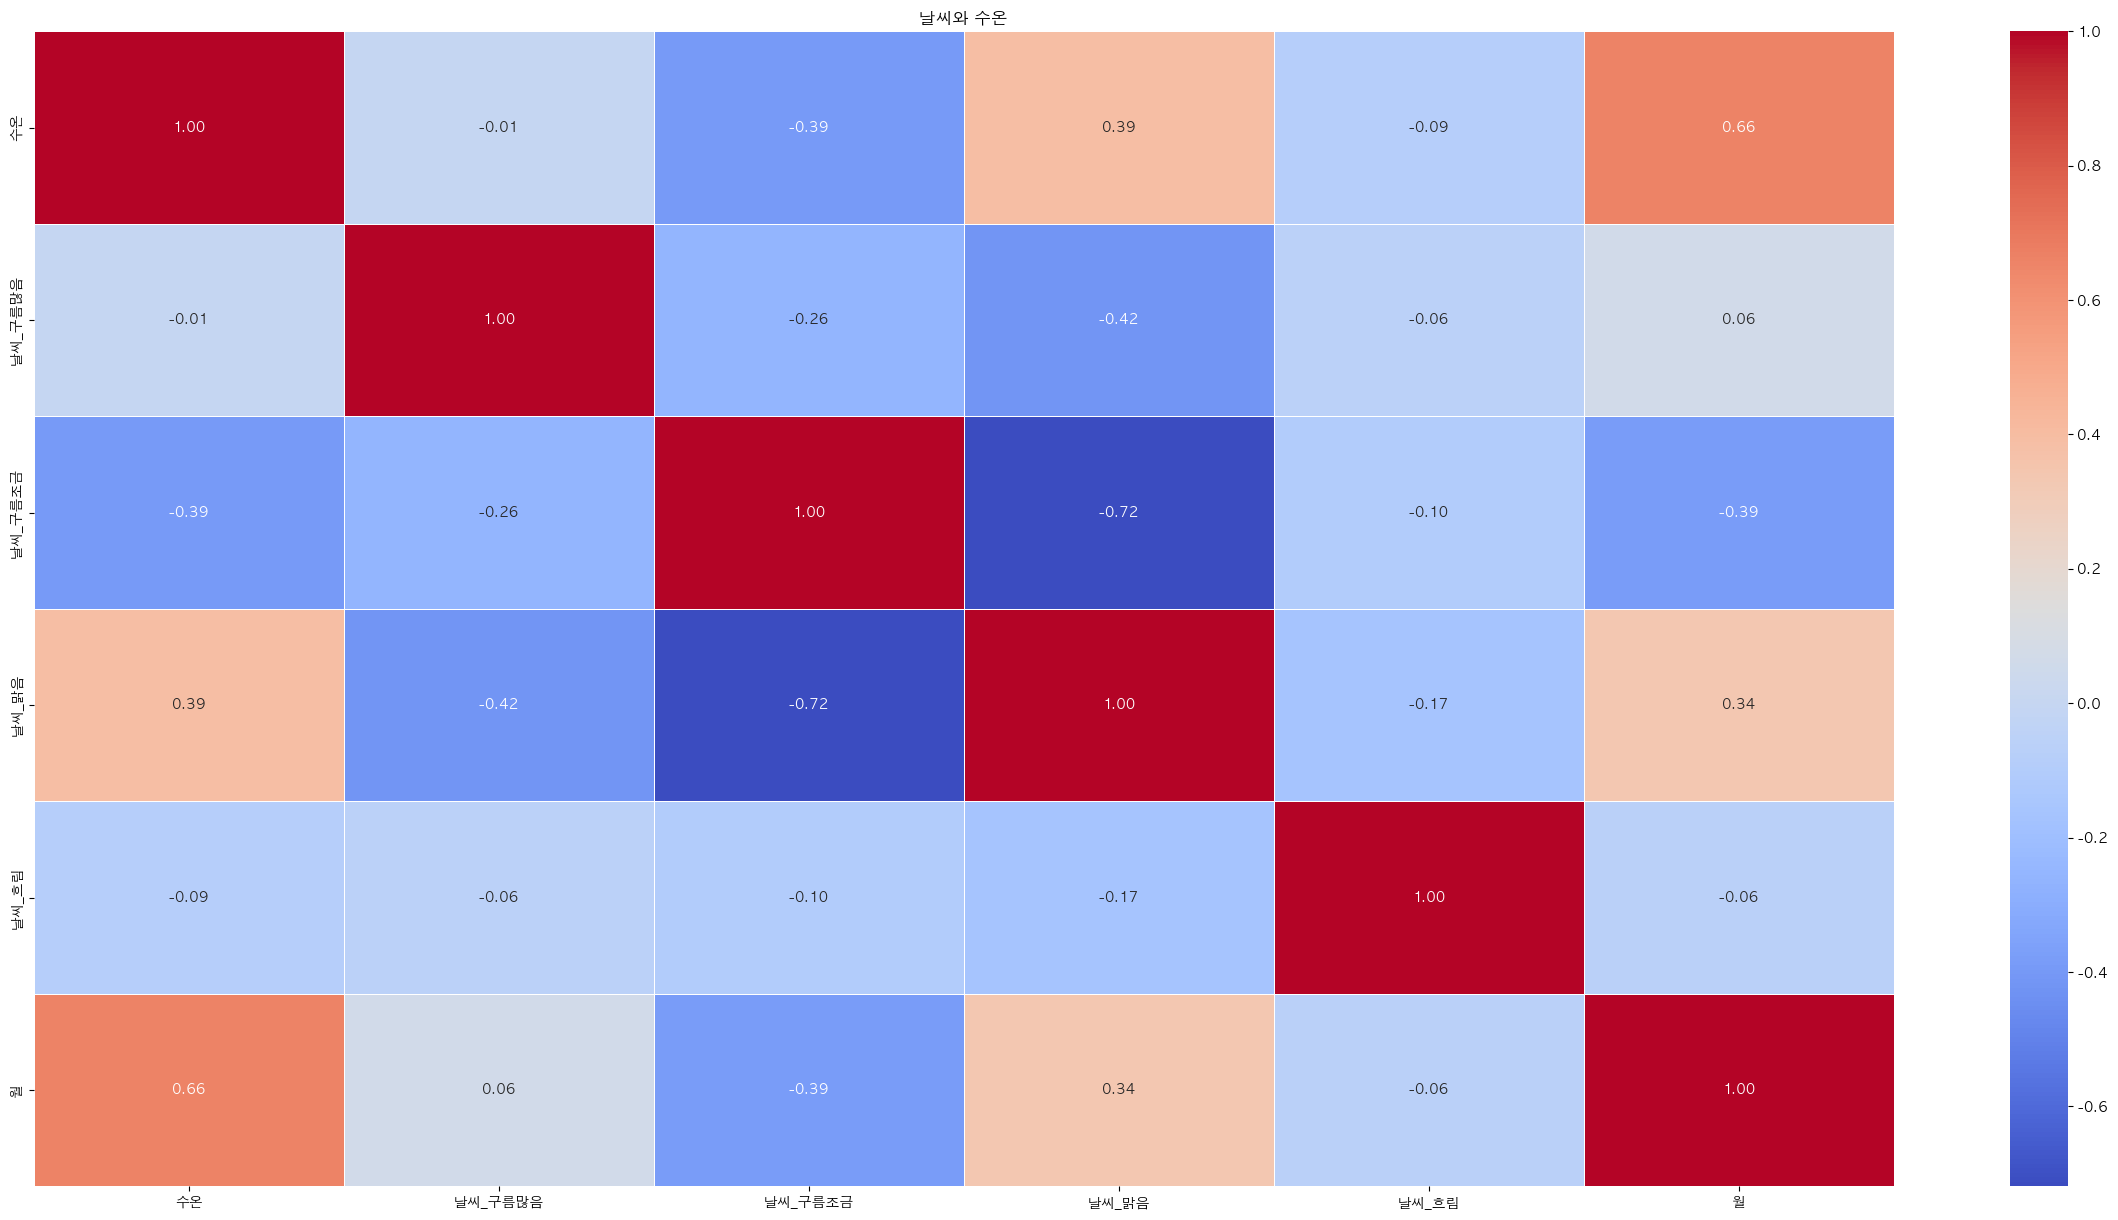

In [196]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [197]:
che = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [198]:
checorrs = che.corr()

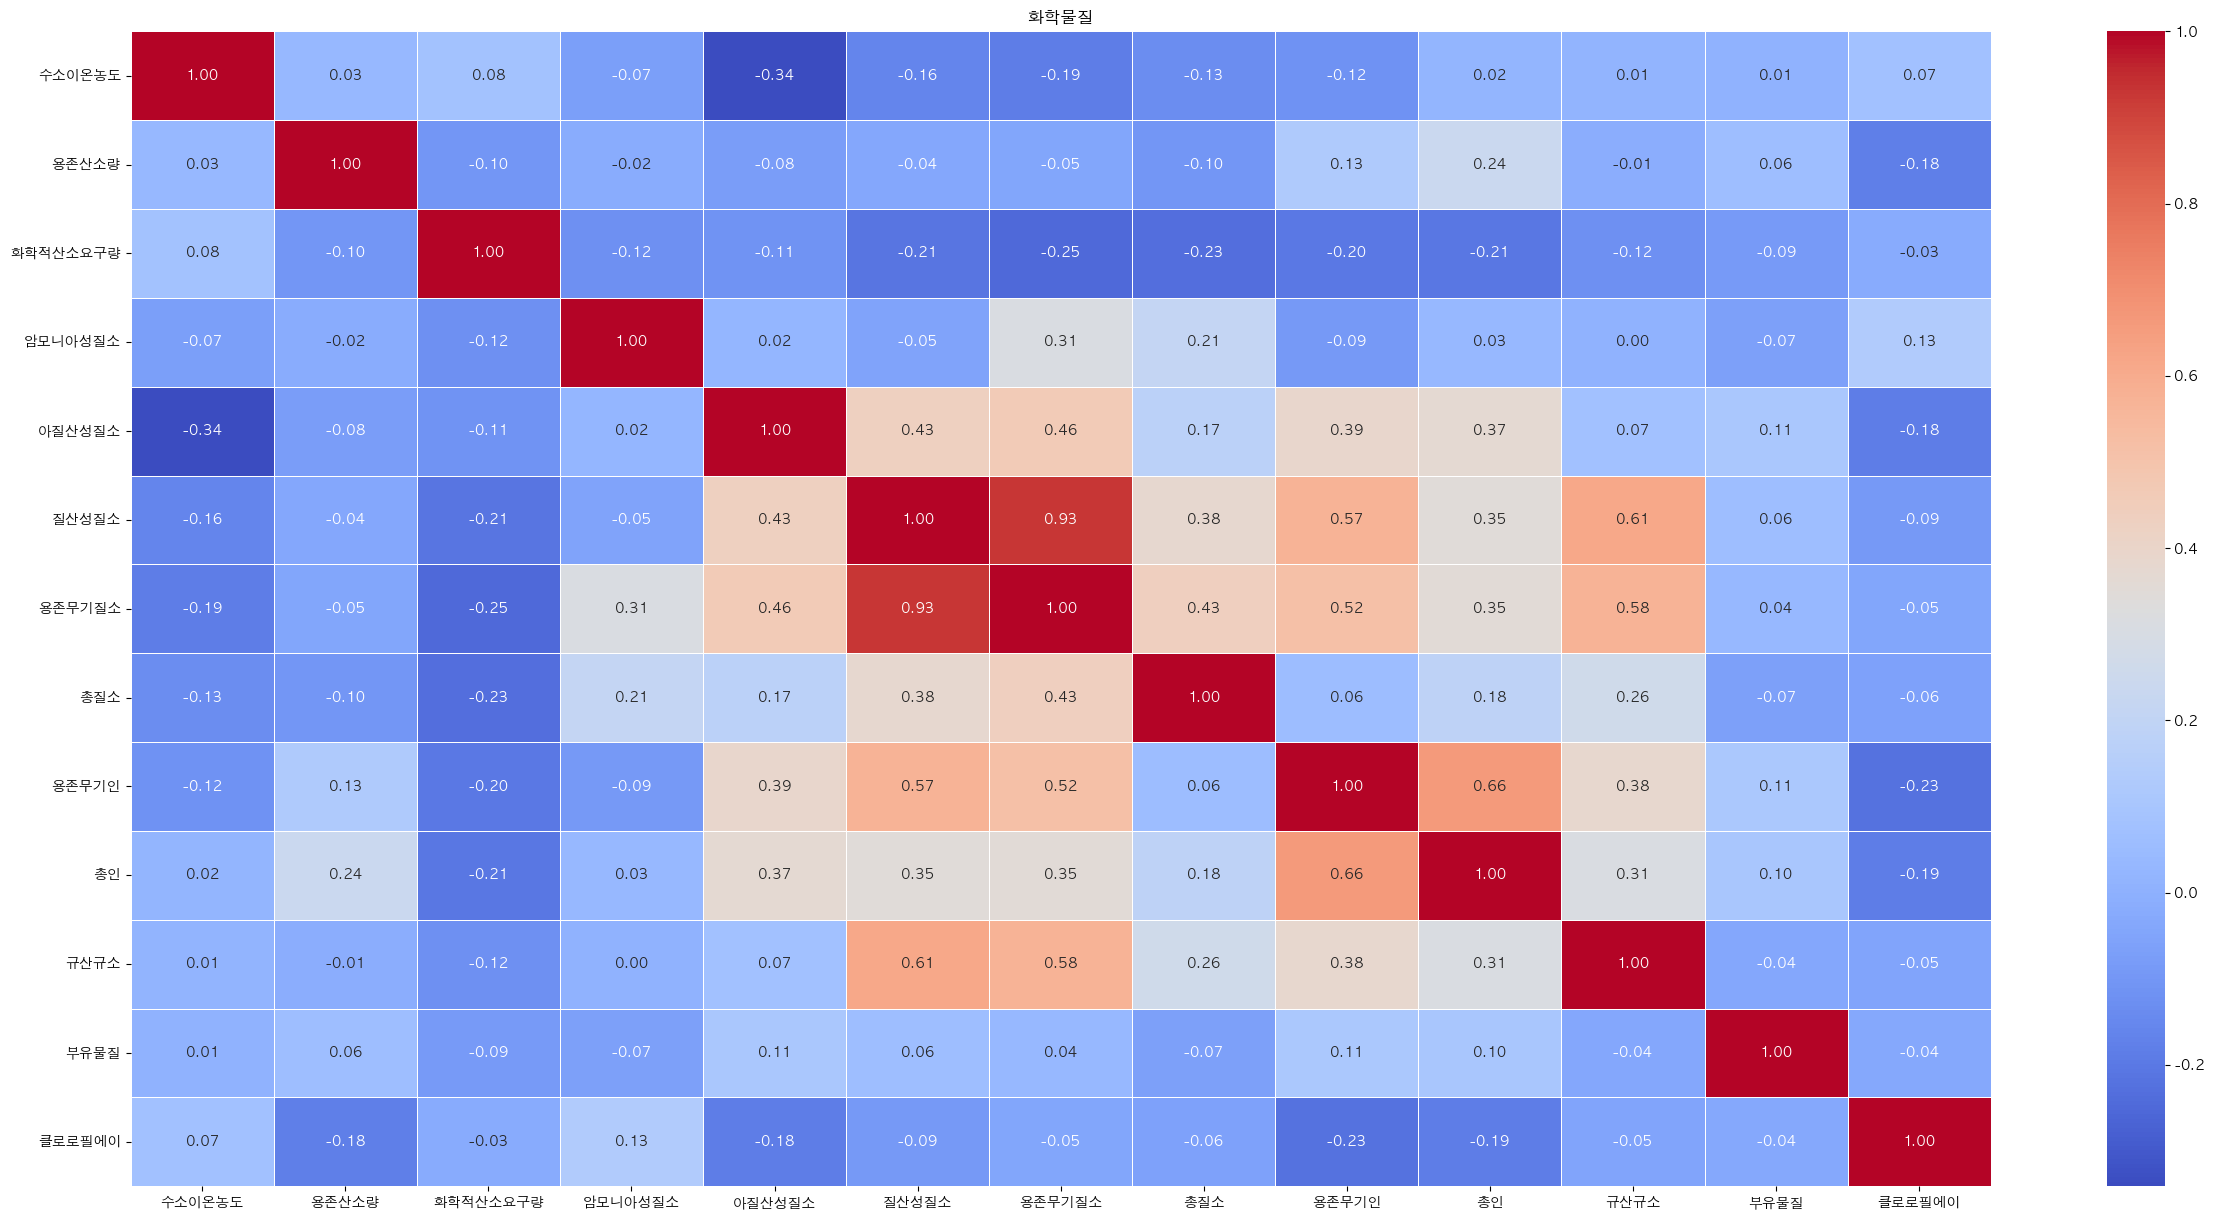

In [199]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [200]:
che2 = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [201]:
che2corrs = che2.corr()

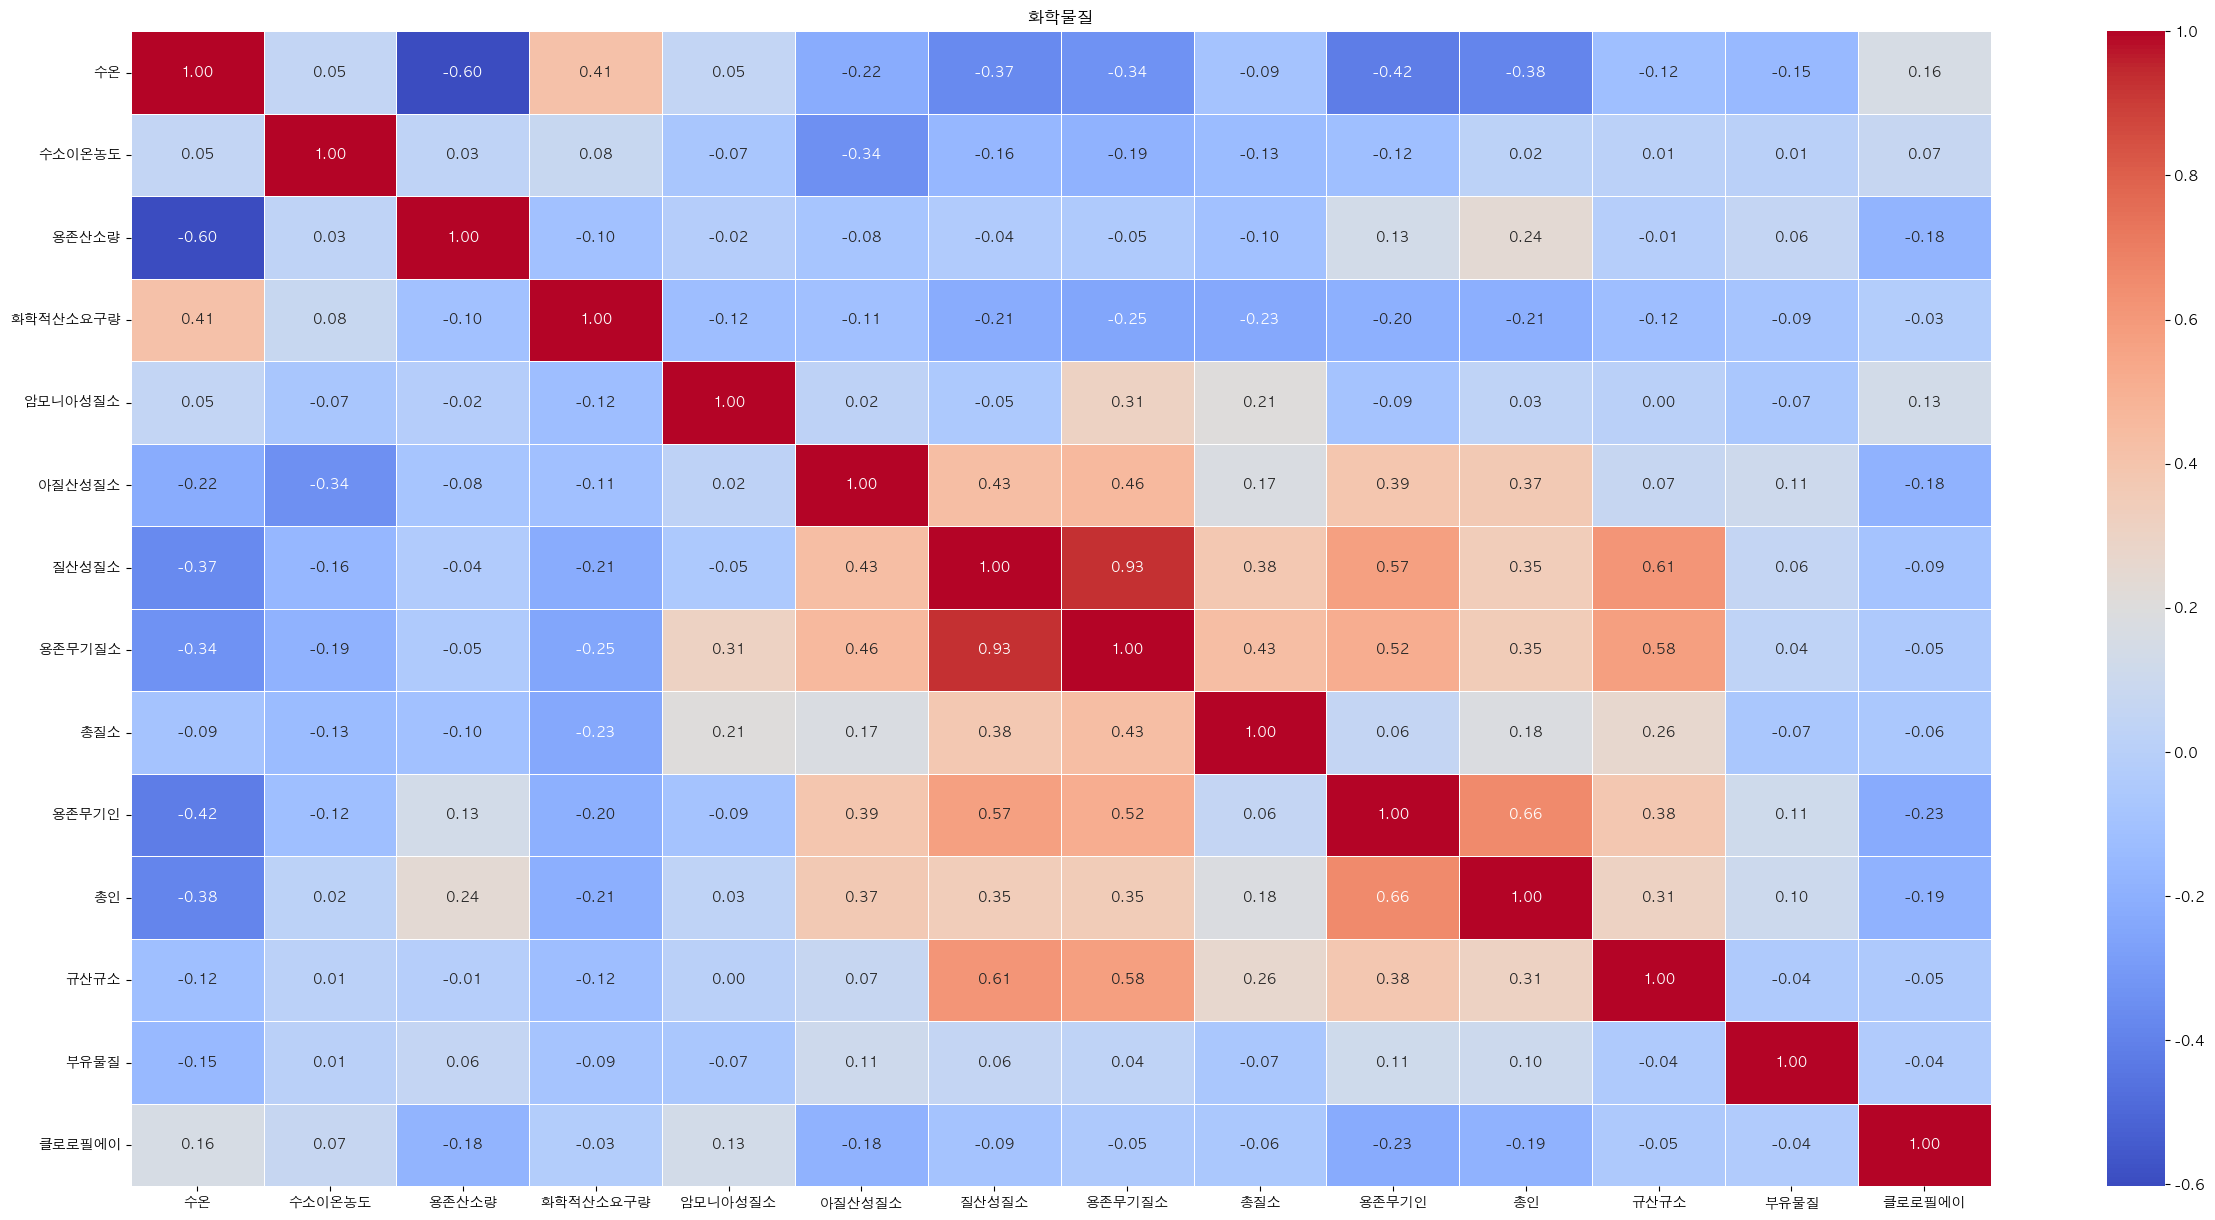

In [202]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714

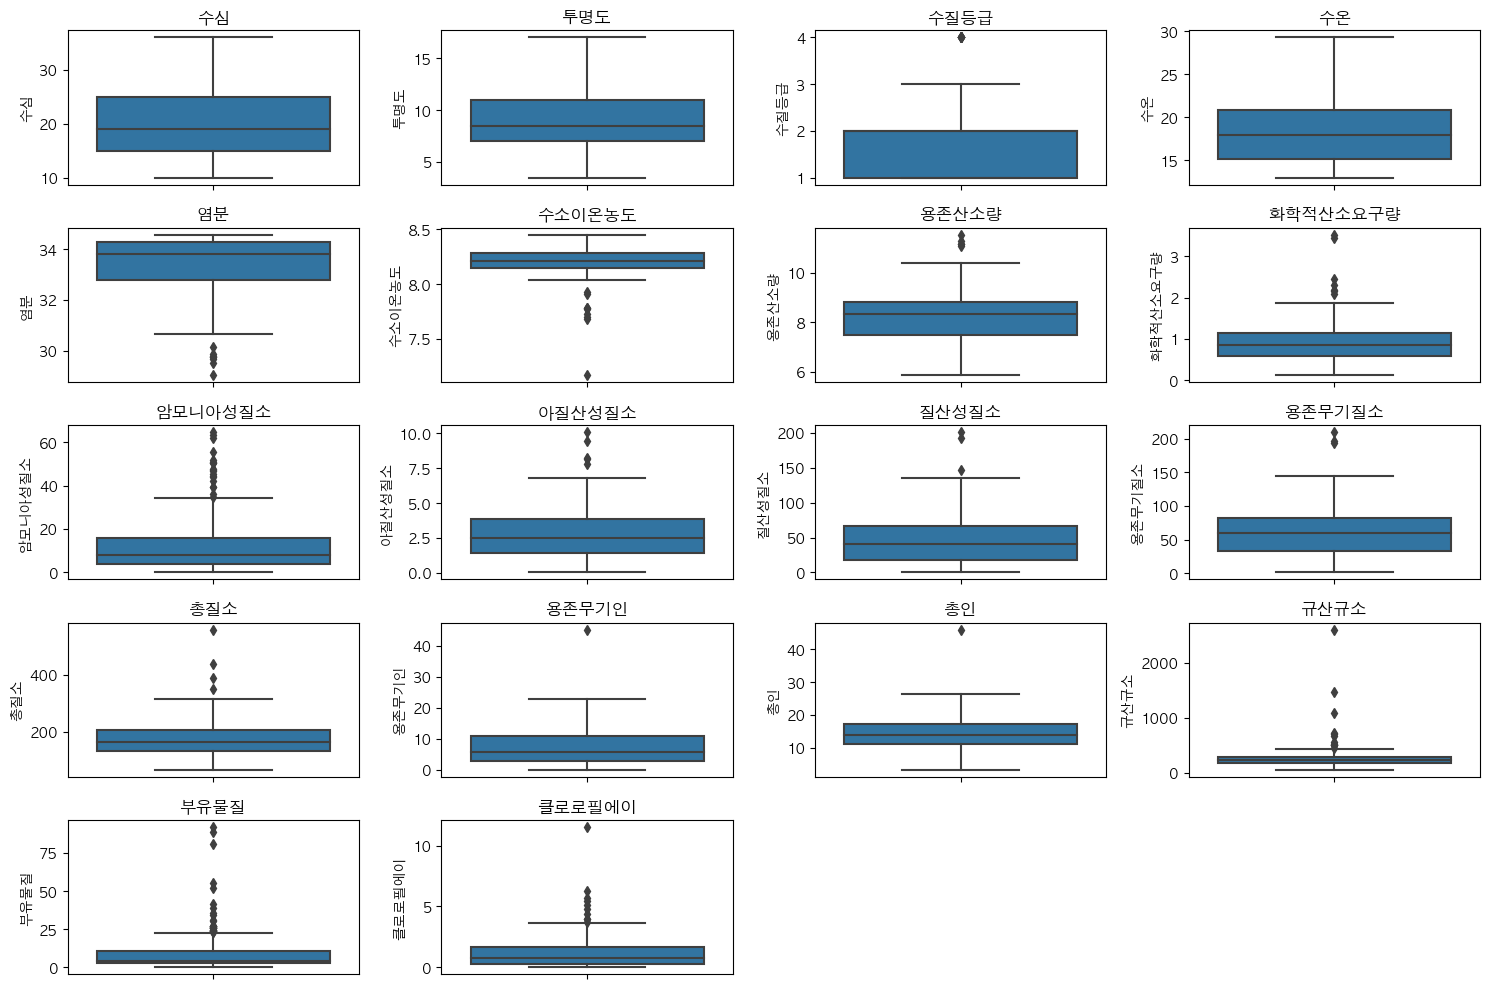

In [203]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=jeju[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/22400

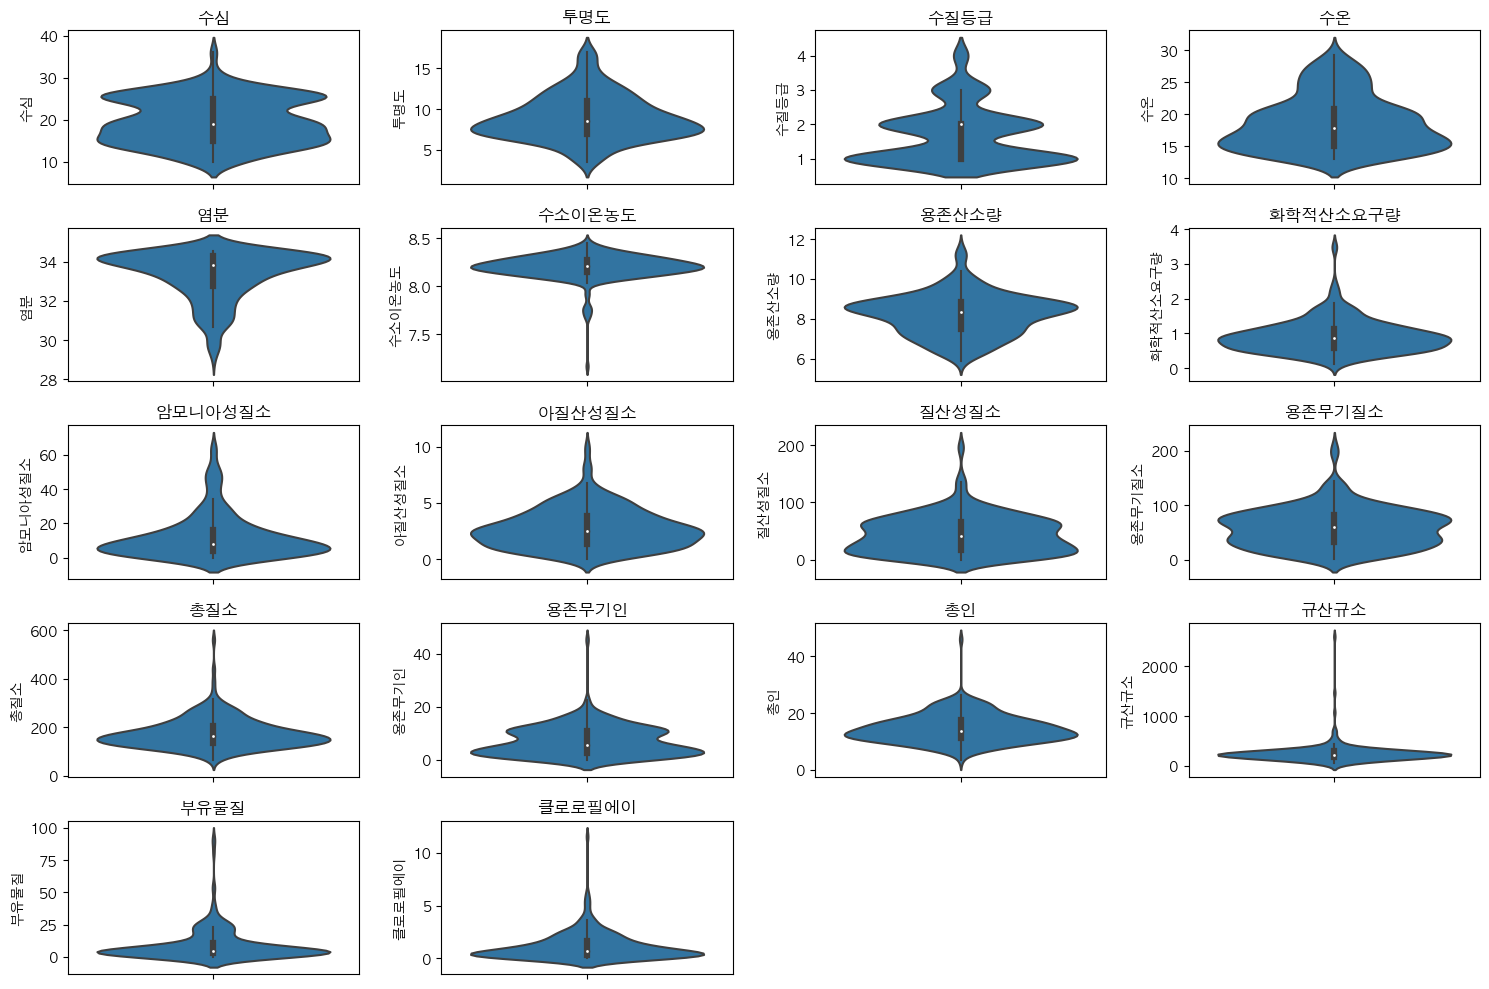

In [204]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=jeju[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82714/23364

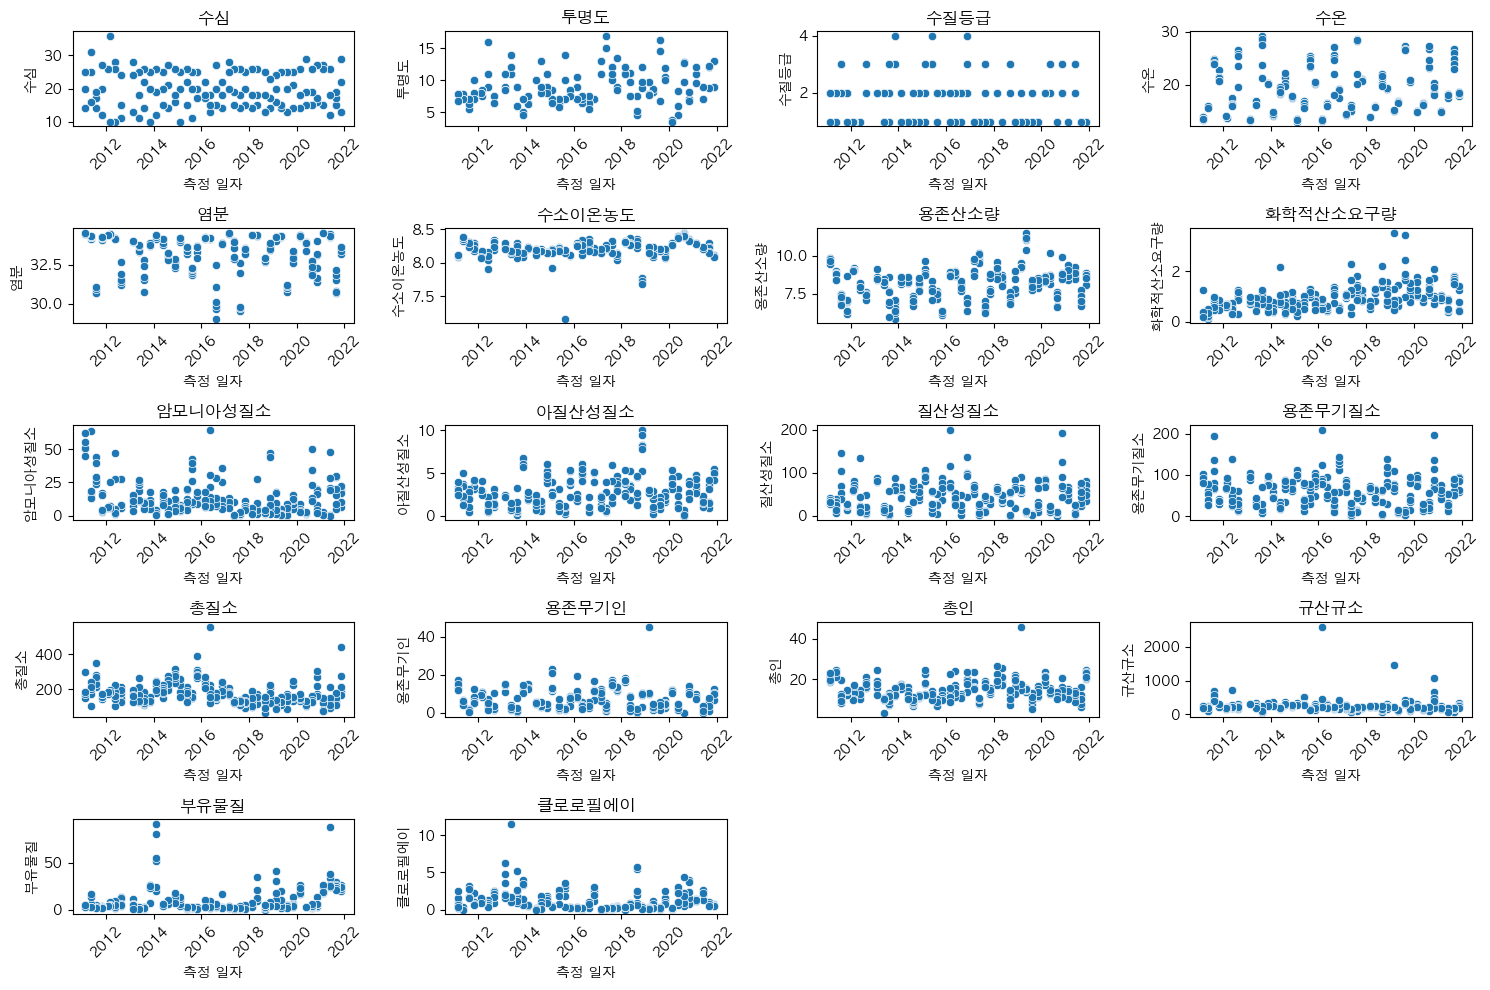

In [205]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=jeju, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

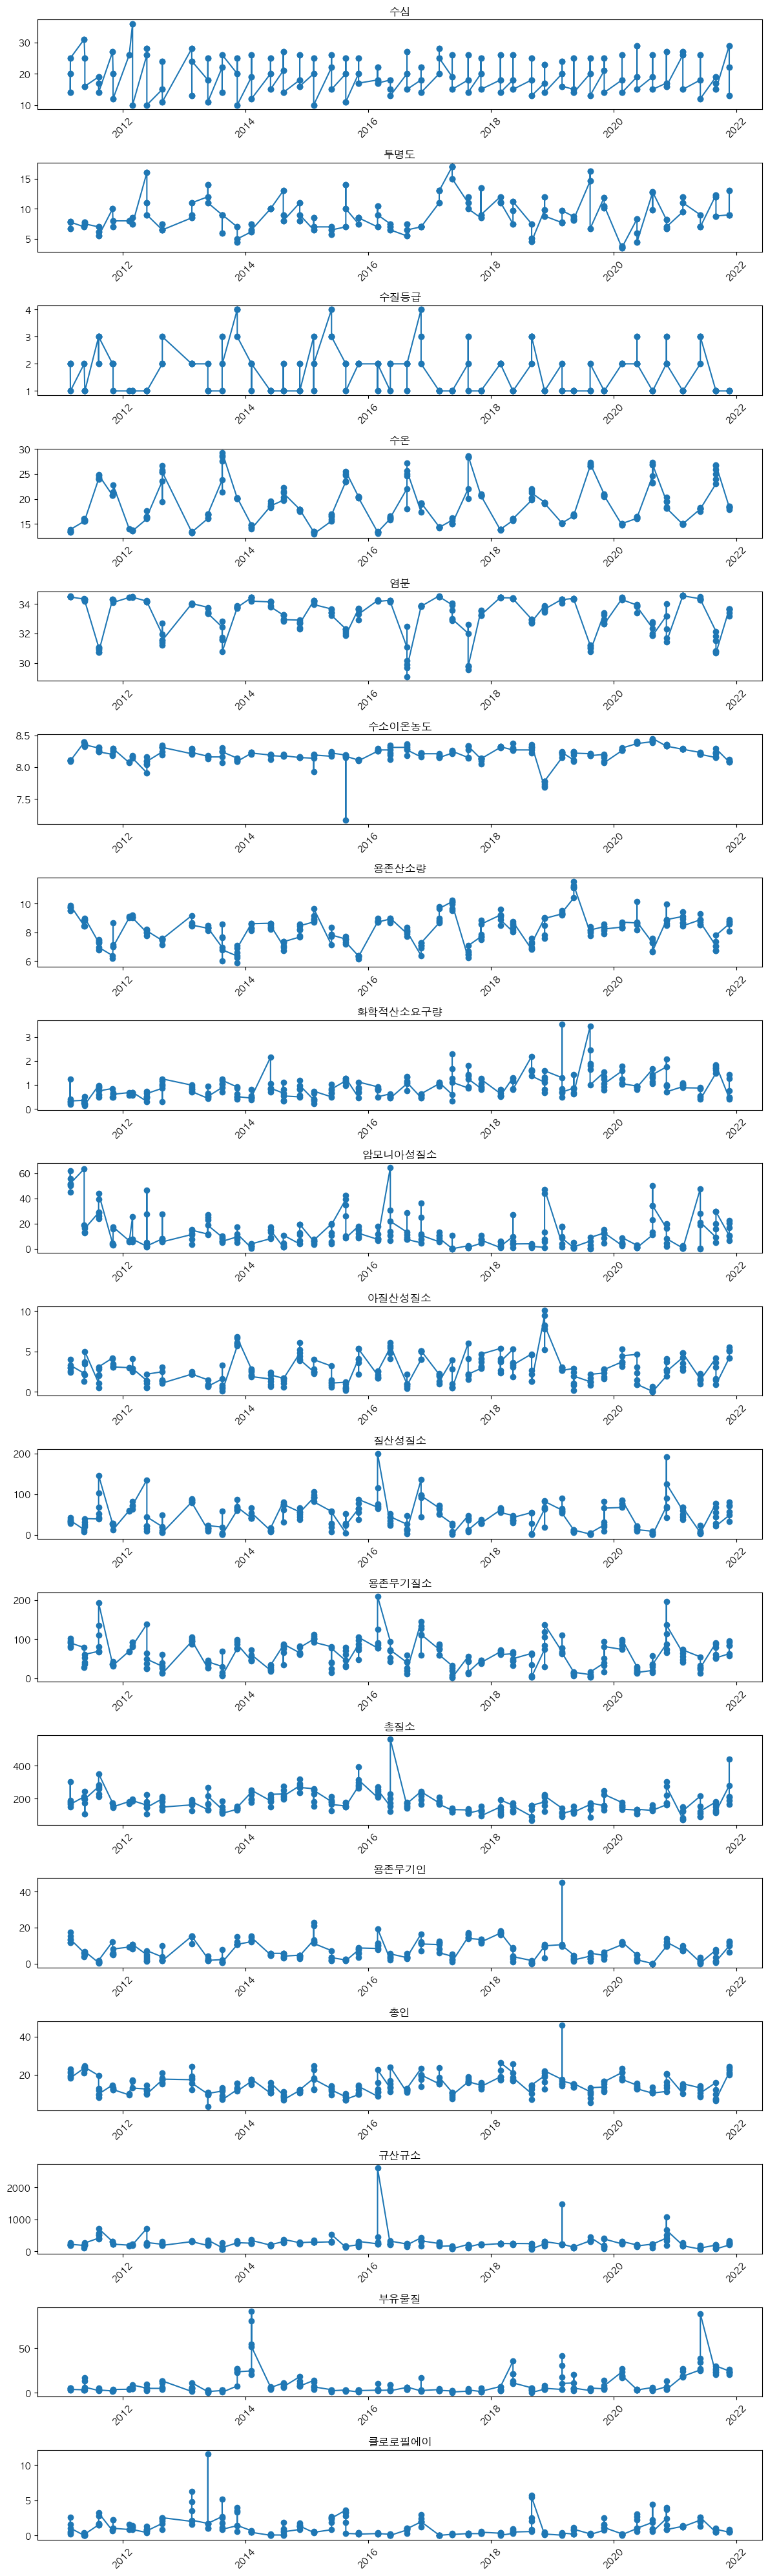

In [206]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(jeju['측정 일자'], jeju[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 정규화 작업을 통해 수온과 상관관계가 높은 특성을 동일한 스케일 내에서 추세 비교

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = jeju.drop('측정 일자', axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

jeju = pd.concat([jeju['측정 일자'], standardized_features_df], axis=1)

jeju.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
20,2021-11-18,1.143707,0.197031,-0.857038,-0.880188,0.980870,0.587197,0.678845,0.139145,-0.876365,...,0.142891,-0.389597,-0.670402,0.932505,-0.154303,-1.0,1.0,1.563349,-1.323459,-0.235638
21,2021-11-18,-0.864858,0.738587,-0.857038,-0.882565,0.964615,0.587197,0.416744,0.075979,-0.788571,...,0.027613,-0.389597,-0.670402,0.932505,-0.154303,1.0,-1.0,1.563349,-1.323459,-0.235638
22,2021-11-18,1.326304,1.099624,-0.857038,-0.858801,0.988998,0.663595,1.164218,0.223366,-0.751277,...,0.050669,-0.389597,-0.670402,0.932505,-0.154303,1.0,-1.0,1.563349,-1.323459,-0.235638
30,2021-11-18,-0.864858,1.388453,-0.857038,1.954795,-1.213542,1.885961,-1.476212,1.065579,1.706195,...,-0.448869,-0.389597,-0.670402,0.932505,-0.154303,-1.0,1.0,1.244752,0.483168,0.268881
31,2021-11-18,1.143707,0.305342,-0.857038,1.940537,-1.107885,1.809563,-0.602540,0.286532,0.089376,...,-0.118406,-0.389597,-0.670402,0.932505,-0.154303,-1.0,1.0,1.244752,0.483168,0.268881


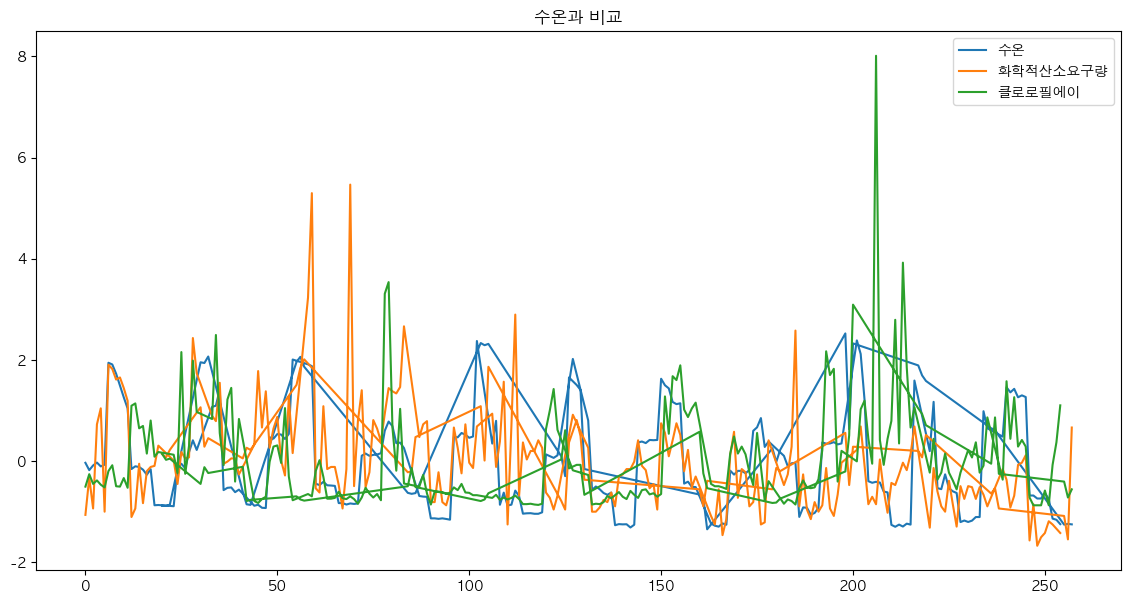

In [208]:
plt.figure(figsize=(14, 7))
plt.plot(jeju['수온'], label='수온')
#plt.plot(jeju['날씨_맑음'], label='날씨_맑음')
plt.plot(jeju['화학적산소요구량'], label='화학적산소요구량')
plt.plot(jeju['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

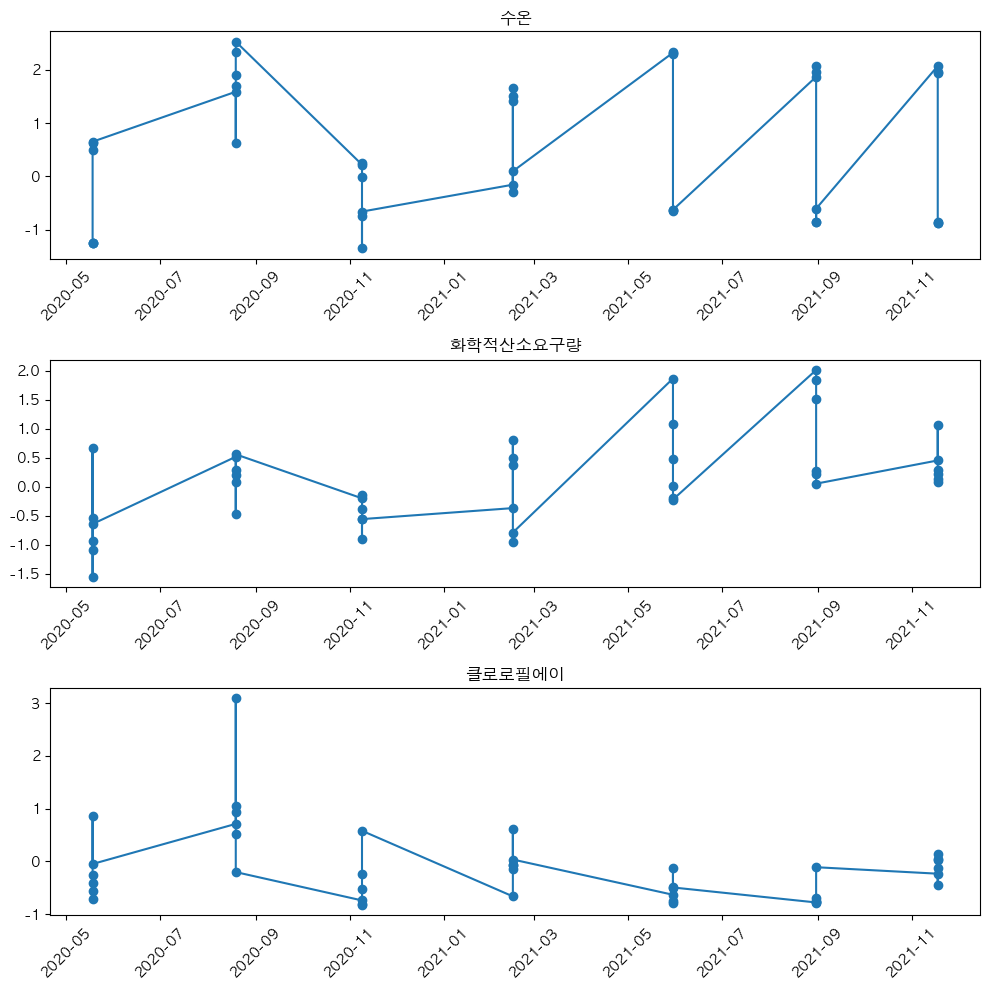

In [209]:
new_col = ['수온', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(jeju['측정 일자'], jeju[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
